In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_data(url):
    df = pd.read_csv(url)
    return df

In [4]:
url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'

In [6]:
df = load_data(url)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
def train_test_split(X,y):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)
    return X_train,X_test,y_train,y_test

In [9]:
X = df.drop(columns='class')
y = df['class']

In [10]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [12]:
X_train.head(2)

,sepal-length,sepal-width,petal-length,petal-width
18,5.7,3.8,1.7,0.3
108,6.7,2.5,5.8,1.8


In [13]:
df.shape

(150, 5)

In [16]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [17]:
def train_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    model = lr.fit(X_train,y_train)
    return model

In [18]:
his = train_basic_classifier(X_train,y_train)

In [19]:
his

LogisticRegression()

In [20]:
def y_prediction(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [21]:
y_predi = y_prediction(his,X_test)

In [ ]:
his.score

In [25]:
def score(model,X_train,y_train):
    model_score = model.score(X_train,y_train)
    return model_score

In [26]:
train_score = score(his,X_train,y_train)
train_score

0.9904761904761905

In [32]:
def testing_score(y_pred,y_test):
    from sklearn.metrics import accuracy_score,precision_score,recall_score
    acc = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred,average='micro')
    precision = precision_score(y_test,y_pred,average='micro')
    return acc,recall,precision

In [39]:
acc,recall,pres=testing_score(y_predi,y_test)
print(f"this is my acc: ",round(acc,2))
print(f"this is my recall: ",round(recall,2))
print(f"this is my precision: ",round(pres,2))

this is my acc:  0.91
this is my recall:  0.91
this is my precision:  0.91


In [40]:
def create_confusion_matrics(model,X_test,y_test):
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
    plt.savefig('Confusion_Matrix.png')

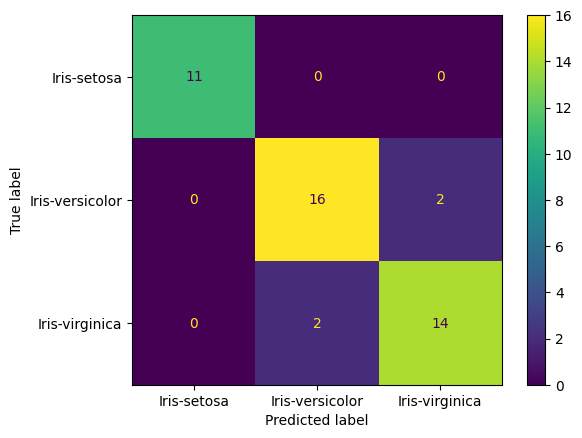

In [44]:
create_confusion_matrics(his,X_test,y_test)

In [47]:
run_matrics = testing_score(y_predi,y_test)
run_matrics

(0.9111111111111111, 0.9111111111111111, 0.9111111111111111)

In [52]:
def testing_score_one(y_pred, y_test):
    from sklearn.metrics import accuracy_score, precision_score,recall_score
    """
    Calculate and return a dictionary of evaluation metrics.
    """
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro')
    }
    return metrics

In [53]:
run_matrics_one = testing_score_one(y_predi,y_test)
run_matrics_one

{'accuracy': 0.9111111111111111,
 'precision': 0.9212962962962963,
 'recall': 0.9212962962962963}

# Start the MLOPs

In [92]:
from datetime import datetime
experiment_name = 'Iris_Classification_Experiment'
run_name = 'iris_classifier1'

In [93]:
def create_experiment_one(experiment_name,run_name,model,run_metrics,confusion_matrix_path = None, roc_auc_plot_path=None, run_params=None):
    import mlflow
    mlflow.search_experiments(experiment_name)
    # mlflow.set_tracking_uri('http://127.0.0.1:5000')
    with mlflow.start_run(run_name=run_name):
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric,run_metrics[metric])

        if not confusion_matrix_path == None:
            mlflow.log_artifacts(confusion_matrix_path, 'confusion_materix.png')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifacts(roc_auc_plot_path, "roc_auc_plot.png")

        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})

        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [94]:
create_experiment_one(experiment_name,run_name,his,run_matrics_one,'Confusion_Matrix.png')

ValueError: unknown enum label "Iris_Classification_Experiment"

In [98]:
import mlflow
logged_model = 'runs:/085f30c739254ee08d40d701347a5765/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

# Adding an MLflow Model to the Model Registry

# Method 1

In [104]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://127.0.0.1:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="iris-classifier")

In [105]:
experiment_name = 'iris_classifier_method1'
run_name = 'run_method1'

In [106]:
create_exp_and_register_model(experiment_name,run_name,his,run_matrics_one,'Confusion.png')

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 403 != 200. Response body: ''

# Method 2

In [111]:
import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
        "runs:/125ef6ca890e4797a73e5c8b8e2de280/model",
        "iris-classifier-3"
    )

Successfully registered model 'iris-classifier-3'.
2024/06/09 18:42:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris-classifier-3, version 1
Created version '1' of model 'iris-classifier-3'.


In [108]:
# Method 3

In [109]:
import mlflow
client = mlflow.tracking.MlflowClient()
client.create_registered_model("basic-classifier-method-3")

<RegisteredModel: aliases={}, creation_timestamp=1717937437925, description='', last_updated_timestamp=1717937437925, latest_versions=[], name='basic-classifier-method-3', tags={}>

In [110]:
client = mlflow.tracking.MlflowClient()
result = client.create_model_version(
    name="basic-classifier-method-3",
    source="125ef6ca890e4797a73e5c8b8e2de280/artifacts/model",
    run_id="125ef6ca890e4797a73e5c8b8e2de280"
)

RestException: INVALID_PARAMETER_VALUE: Invalid model version source: '/Users/bhikipallai/Desktop/python_Anaconda/ML_projects_practice/MLFlow/MLFlowServingModels/125ef6ca890e4797a73e5c8b8e2de280/artifacts/model'. To use a local path as a model version source, the run_id request parameter has to be specified and the local path has to be contained within the artifact directory of the run specified by the run_id.

# fetch the model with version id and do the prediction

In [112]:
import mlflow.pyfunc

In [113]:
model_name = 'iris-classifier-2'
version = 1
model = mlflow.pyfunc.load_model(model_uri = f"models:/{model_name}/{version}")

In [114]:
mlflow_pred = model.predict(X_test)

In [115]:
print(mlflow_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


In [116]:
model.predict([[6.7,3.3,5.7,2.1]])

/Applications/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# Change the staging from code

In [117]:
client = mlflow.tracking.MlflowClient()

In [134]:
from mlflow import MlflowClient

client = MlflowClient()

# Ensure the model name is correctly formatted
model_name = "iris-classifier-2"
version_1=1
version_2=2

# Create "champion" alias for version 1 of the model
client.transition_model_version_stage(name=model_name, "champion",1)
client.set_registered_model_alias

# Reassign the "champion" alias to version 2
client.set_registered_model_alias(name=model_name, alias="champion")


SyntaxError: positional argument follows keyword argument (3940775014.py, line 11)

In [136]:
mlflow.set_tracking_uri('http://localhost/:5000')

In [137]:
set MLFLOW_TRACKING_URI=http://localhost:5000

SyntaxError: invalid syntax (391729263.py, line 1)

In [138]:
export MLFLOW_TRACKING_URI=http://localhost:5000

SyntaxError: invalid syntax (1345152905.py, line 1)